In [4]:
import cv2
import os
import random
import shutil
import numpy as np
from matplotlib import pyplot as plt

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
from tensorflow.keras.layers import Dropout
import tensorflow as tf

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Data pipeline

In [ ]:
home = r"" # setup home
datapool = os.path.join(home, 'data','')

In [ ]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(datapool, file)
        os.replace(EX_PATH, NEW_PATH)

In [80]:
lfw_folder = r""  # Replace with the path to your LFW dataset folder
negative_folder = r""  # Replace with the path to your negative images folder

person_folders = os.listdir(lfw_folder)
current_person_images = os.listdir(current_person_folder_path)
current_image_path = os.path.join(current_person_folder_path, current_person_images[0])
print(current_person_images[0])
i=i+1
print(i)

Zurab_Tsereteli_0001.jpg
1


In [82]:
for i in range(5):
    print(i, end=", ") # prints: 0, 1, 2, 3, 4,
    i=i+1
    continue

0, 1, 2, 3, 4, 

In [85]:
lfw_folder = r"" #setup LFW folder
negative_folder = r"" #setup negative folder   



person_folders = os.listdir(lfw_folder)
num_persons = len(person_folders)

skip_next = False    


for i in range(len(person_folders)-1):
    
    if skip_next:
        skip_next = False
        continue
    
    
    current_person_folder_path = os.path.join(lfw_folder, person_folders[i])
    next_person_folder_path = os.path.join(lfw_folder, person_folders[i+1])
   
    if len(os.listdir(current_person_folder_path)) >= 2:
       
        current_person_images = os.listdir(current_person_folder_path)
        current_image_path = os.path.join(current_person_folder_path, current_person_images[0])
        shutil.move(current_image_path, negative_folder)

       
        current_image_path1 = os.path.join(current_person_folder_path, current_person_images[1])
        shutil.move(current_image_path1, negative_folder)

        
        next_person_images = os.listdir(next_person_folder_path)
        next_image_path = os.path.join(next_person_folder_path, next_person_images[0])
        shutil.move(next_image_path, negative_folder)
        skip_next = True

In [ ]:
home = r"" # setup home
POS_PATH = os.path.join(home, 'data', 'positive','')
NEG_PATH = os.path.join(home, 'data', 'negative','')
ANC_PATH = os.path.join(home, 'data', 'anchor','')
TSTNG_PATH = os.path.join(home, 'data', 'testng','')
TSTPS_PATH = os.path.join(home, 'data', 'testps','')
TSTAN_PATH = os.path.join(home, 'data', 'testan','')

In [ ]:
testingData=tf.data.Dataset.list_files(home+'*.jpg').take(201)

# Preprocessing

In [7]:
def preprocess(file_path):
    
    byte_img = tf.io.read_file(file_path)
     
    img = tf.io.decode_jpeg(byte_img)
        
    img = tf.image.resize(img, (224,224))
     
    img = img / 255.0

    return img

# Training

In [8]:
image_folder = r"" # training data folder


image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.jpg')]


positive_pairs = []
negative_pairs = []
positive_pairs1 = []
negative_pairs1 = []

for i in range(0, len(image_files) - 1, 3):
    positive_pairs.append(image_files[i])
    positive_pairs1.append(image_files[i + 1])
    negative_pairs.append(image_files[i + 1])
    negative_pairs1.append(image_files[i + 2])

positive_labels = tf.ones(len(positive_pairs), dtype=tf.int32)
negative_labels = tf.zeros(len(negative_pairs), dtype=tf.int32)

positive_dataset = tf.data.Dataset.from_tensor_slices(positive_pairs)
negative_dataset = tf.data.Dataset.from_tensor_slices(negative_pairs)
positive_dataset1 = tf.data.Dataset.from_tensor_slices(positive_pairs1)
negative_dataset1 = tf.data.Dataset.from_tensor_slices(negative_pairs1)

positives = tf.data.Dataset.zip((positive_dataset, positive_dataset1, tf.data.Dataset.from_tensor_slices(positive_labels)))

negatives = tf.data.Dataset.zip((negative_dataset, negative_dataset1, tf.data.Dataset.from_tensor_slices(negative_labels)))

data = positives.concatenate(negatives)

# Validation

In [9]:
image_folder = r"" # training data folder

image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.jpg')]

positive_pairs = []
negative_pairs = []
positive_pairs1 = []
negative_pairs1 = []

for i in range(0, len(image_files) - 1, 3):
    positive_pairs.append(image_files[i])
    positive_pairs1.append(image_files[i + 1])
    negative_pairs.append(image_files[i + 1])
    negative_pairs1.append(image_files[i + 2])


positive_labels = tf.ones(len(positive_pairs), dtype=tf.int32)
negative_labels = tf.zeros(len(negative_pairs), dtype=tf.int32)

positive_dataset = tf.data.Dataset.from_tensor_slices(positive_pairs)
negative_dataset = tf.data.Dataset.from_tensor_slices(negative_pairs)
positive_dataset1 = tf.data.Dataset.from_tensor_slices(positive_pairs1)
negative_dataset1 = tf.data.Dataset.from_tensor_slices(negative_pairs1)

positives = tf.data.Dataset.zip((positive_dataset, positive_dataset1, tf.data.Dataset.from_tensor_slices(positive_labels)))

negatives = tf.data.Dataset.zip((negative_dataset, negative_dataset1, tf.data.Dataset.from_tensor_slices(negative_labels)))

val_data = positives.concatenate(negatives)

# Testing

In [10]:
image_folder = r"" # training data folder

image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.jpg')]

positive_pairs = []
negative_pairs = []
positive_pairs1 = []
negative_pairs1 = []

for i in range(0, len(image_files) - 1, 3):
    positive_pairs.append(image_files[i])
    positive_pairs1.append(image_files[i + 1])
    negative_pairs.append(image_files[i + 1])
    negative_pairs1.append(image_files[i + 2])

positive_labels = tf.ones(len(positive_pairs), dtype=tf.int32)
negative_labels = tf.zeros(len(negative_pairs), dtype=tf.int32)

positive_dataset = tf.data.Dataset.from_tensor_slices(positive_pairs)
negative_dataset = tf.data.Dataset.from_tensor_slices(negative_pairs)
positive_dataset1 = tf.data.Dataset.from_tensor_slices(positive_pairs1)
negative_dataset1 = tf.data.Dataset.from_tensor_slices(negative_pairs1)

positives = tf.data.Dataset.zip((positive_dataset, positive_dataset1, tf.data.Dataset.from_tensor_slices(positive_labels)))

negatives = tf.data.Dataset.zip((negative_dataset, negative_dataset1, tf.data.Dataset.from_tensor_slices(negative_labels)))

tst_data = positives.concatenate(negatives)

In [11]:
# for alternative zipping
index = 1
for (positive_sample, negative_sample, label) in data.as_numpy_iterator():
    positive_image, positive_image1 = positive_sample
    negative_image, negative_image1 = negative_sample
    
    
    print(f"Pair {index}")
    print("Positive Image:", positive_image.decode('utf-8'))
    print("Positive Image1:", positive_image1.decode('utf-8'))
    print("Label:", label)
    print("---")
    index += 1

ValueError: too many values to unpack (expected 2)

In [ ]:
index = 1
for sample in tst_data.as_numpy_iterator():
    print(f"Pair {index}")
    print("Positive Image:", sample[0].decode('utf-8'))
    print("Positive Image1:", sample[1].decode('utf-8'))
    print("Label:", sample[2])
    print("---")
    index += 1

In [ ]:
for sample in data.as_numpy_iterator():
    image_filename = sample[0].decode('utf-8')
    label = sample[1]
    print("Image Filename:", image_filename)
    print("Label:", label)
    print("---")

# Twin preprocessing

In [12]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

# Training partition

In [13]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [14]:
# Training partition
train_data = data.take(round(len(data)*1.0))
print(len(train_data))
train_data = train_data.batch(8)
print(len(train_data))
train_data = train_data.prefetch(4)
print(len(train_data))

204
26
26


# Validation data partition

In [15]:
# Build dataloader pipeline
val_data = val_data.map(preprocess_twin)
val_data = val_data.cache()
val_data = val_data.shuffle(buffer_size=10000)

In [16]:
# Training partition
validation_data = val_data.take(round(len(data)*1.0))
print(len(validation_data))
validation_data = validation_data.batch(8)
print(len(validation_data))
validation_data = validation_data.prefetch(4)
print(len(validation_data))

80
10
10


# Testing partition

In [17]:
# Build dataloader pipeline
tst_data = tst_data.map(preprocess_twin)
tst_data = tst_data.cache()
tst_data = tst_data.shuffle(buffer_size=10000)

In [18]:
# Testing partition
ttdata = tst_data.skip(round(len(data)*0.0))
ttdata = ttdata.take(round(len(data)*1.0))
print(len(ttdata))
ttdata = ttdata.batch(16)
ttdata = ttdata.prefetch(4)
print(len(ttdata))

80
5


# Embedding layer

In [19]:
def make_embedding():
    #input
    inp = Input(shape=(224,224,3), name="input_image")
    
    #block0
    c0 = Conv2D(32, (15,15),  activation='relu')(inp)
    m0 = MaxPooling2D(64, (2,2), padding='same')(c0)
    d0 = Dropout(0.2)(m0)  # Adding dropout layer
             
    #block1
    c1 = Conv2D(64, (10,10), activation='relu')(d0)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    #block2
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    #block3
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    #block4
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation= 'sigmoid')(f1)
    
    
    
    return Model(inputs = [inp], outputs = [d1], name ='embedding')

In [20]:
modelEmbedding = make_embedding()

In [21]:
modelEmbedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 210, 210, 32)      21632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 105, 105, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 105, 105, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                     

# Custom Layer

In [21]:
class L1DistCustom(Layer):
    def __init__(self, **kwargs):
        super().__init__()
    # for diferent distance calculations look into theoretical part of my paper. Siamese network theory
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding) 

In [22]:
siamese_layer= L1DistCustom()

# Building model

In [23]:
def siamese_model():
    input_image = Input(name='inp_img', shape=(224,224,3))
    validation_image= Input(name='valid_img', shape=(224,224,3))
    
    #join models
    siamese_layer = L1DistCustom()
    siamese_layer._name = 'distance'
    distances = siamese_layer(modelEmbedding(input_image), modelEmbedding(validation_image))
    
    #clasifier
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseModelV7')

In [24]:
siameseModel = siamese_model()

In [25]:
siameseModel.summary()

Model: "SiameseModelV7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inp_img (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 valid_img (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         39167680    ['inp_img[0][0]',                
                                                                  'valid_img[0][0]'] 

# Model parameters

In [26]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [27]:
optimization = tf.keras.optimizers.Adam(1e-4)

# Training step function

In [28]:
@tf.function
def train_step(batch):
    
    with tf.GradientTape() as tape:
        x=batch[:2]
        y=batch[2]
        
        yhat = siameseModel(x, training=True)
        loss = binary_cross_loss(y, yhat)
    print(loss)
    
    grad = tape.gradient(loss, siameseModel.trainable_variables)
    optimization.apply_gradients(zip(grad, siameseModel.trainable_variables))
    return loss

In [29]:
# Use this to gain performance
@tf.function
def test_step(batch):
    x=batch[:2]
    y=batch[2]
    yhat = siameseModel(x, training=False)
    val_acc_metric.update_state(y, val_logits)
    
    return yhat, val_acc_metric

# Custom training loop

In [30]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy, BinaryAccuracy

In [31]:
binary_accuracy = tf.keras.metrics.BinaryAccuracy(threshold=0.5)

In [32]:
def train(data, v_data, EPOCHS):
    train_loss_results = []
    train_accuracy_results = []
    train_precision_results = []
    train_recall_results = []
    validation_loss_results = []
    validation_accuracy_results = []
    validation_precision_results = []
    validation_recall_results = []
    
    for epoch in range (1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        r = Recall()
        p = Precision()
        epoch_accuracy  = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
        epoch_loss_avg = tf.keras.metrics.Mean()
        
        for idx, batch in enumerate(data):
            #train_step(batch)
            #progbar.update(idx+1)
            loss = train_step(batch)
            yhat = siameseModel.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat)
            epoch_accuracy.update_state(batch[2], yhat)
            epoch_loss_avg.update_state(loss)            
            progbar.update(idx+1)
           
        print("training results")
        print(epoch_loss_avg.result().numpy(), epoch_accuracy.result().numpy(), r.result().numpy(), p.result().numpy())
        train_loss_results.append(epoch_loss_avg.result())
        train_accuracy_results.append(epoch_accuracy.result())
        train_precision_results.append(p.result())
        train_recall_results.append(r.result())
        epoch_loss_avg.reset_states()
        epoch_accuracy.reset_states()
        p.reset_states()
        r.reset_states()
        
        
        # Update val metrics
        val_r = Recall()
        val_p = Precision()
        val_epoch_accuracy  = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
        val_epoch_loss_avg = tf.keras.metrics.Mean()
        
        for idx, batch1 in enumerate(v_data):
            val_y_hat = siameseModel(batch1[:2], training=False)
            val_r.update_state(batch1[2], val_y_hat)
            val_p.update_state(batch1[2], val_y_hat)
            val_epoch_accuracy.update_state(batch1[2], val_y_hat)
         
        print("validation results")
        print(val_epoch_accuracy.result().numpy(), val_r.result().numpy(), val_p.result().numpy())
        validation_accuracy_results.append(val_epoch_accuracy.result())
        validation_precision_results.append(val_p.result())
        validation_recall_results.append(val_r.result())
        
        val_epoch_accuracy.reset_states()
        val_p.reset_states()
        val_r.reset_states()
        
        
        
    return train_loss_results, train_accuracy_results, train_precision_results,train_recall_results, validation_accuracy_results,validation_precision_results,validation_recall_results 

In [33]:
outputloss = []
outputaccuracy = []
outputprecision = []
outputrecall = []

output_val_accuracy = []
output_val_precision = []
output_val_recall = []

In [34]:
EPOCHS = 15

In [35]:
outputloss,outputaccuracy,outputprecision, outputrecall,output_val_accuracy,output_val_precision,output_val_recall =train(train_data,validation_data, EPOCHS)


 Epoch 1/15
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
26/26 [==============================] - 39s 1s/step
training results
0.7067616 0.622549 0.46078432 0.68115944
validation results
0.4875 0.05 0.4

 Epoch 2/15
26/26 [==============================] - 35s 1s/step
training results
0.6960448 0.5245098 0.20588236 0.5675676
validation results
0.5 0.075 0.5

 Epoch 3/15
26/26 [==============================] - 33s 1s/step
training results
0.69365245 0.5882353 0.5588235 0.59375
validation results
0.5125 0.25 0.5263158

 Epoch 4/15
26/26 [==============================] - 33s 1s/step
training results
0.6896944 0.5882353 0.23529412 0.8
validation results
0.525 0.1 0.6666667

 Epoch 5/15
26/26 [==============================] - 32s 1s/step
training results
0.6968819 0.5882353 0.5686275 0.59183675
validation results
0.5125 0.375 0.51724136

 Epoch 6/15
26/26 [=======================

26/26 [==============================] - 31s 1s/step
training results
0.70290303 0.50980395 0.078431375 0.5714286
validation results
0.5125 0.025 1.0

 Epoch 12/15
26/26 [==============================] - 31s 1s/step
training results
0.6937881 0.5 0.05882353 0.5
validation results
0.5125 0.025 1.0

 Epoch 13/15
26/26 [==============================] - 31s 1s/step
training results
0.68972707 0.50490195 0.009803922 1.0
validation results
0.5 0.0 0.0

 Epoch 14/15
26/26 [==============================] - 31s 1s/step
training results
0.69120944 0.5 0.0 0.0
validation results
0.5 0.0 0.0

 Epoch 15/15
26/26 [==============================] - 32s 1s/step
training results
0.68792695 0.50980395 0.039215688 0.6666667
validation results
0.5125 0.05 0.6666667


# Saving model

In [ ]:
siameseModel.save('siamesemodelcompiledLT2V3metrics.h5')

In [ ]:
siameseModel.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.Accuracy()])


# Ploting metrics

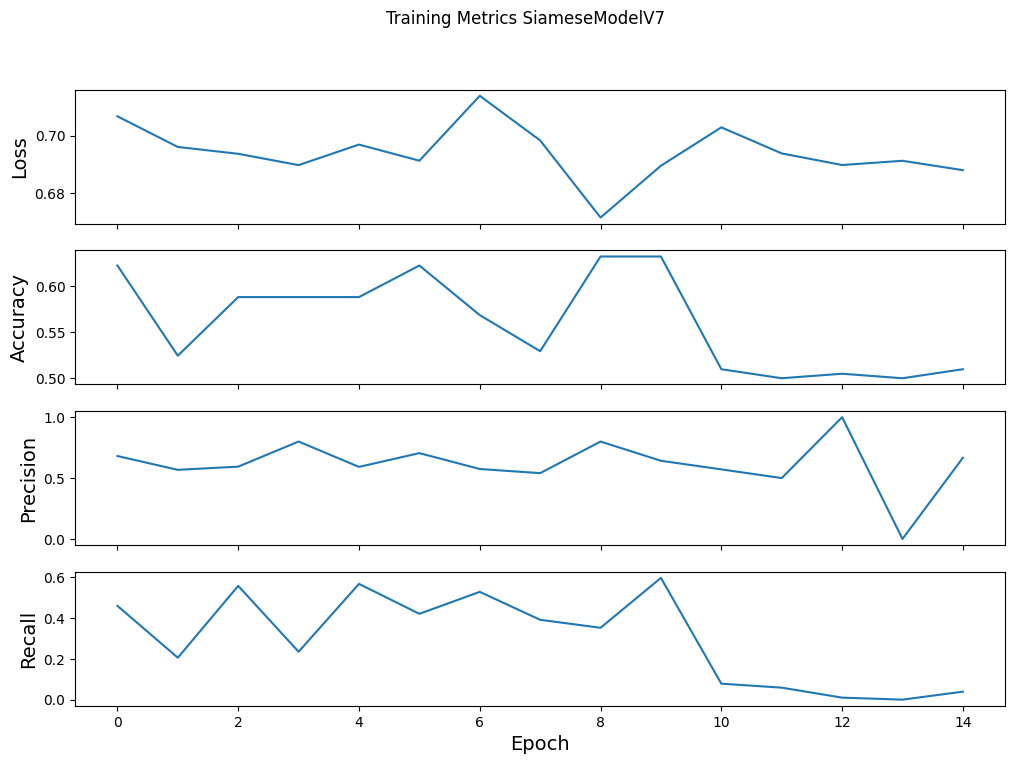

In [36]:
fig, axes = plt.subplots(4, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics SiameseModelV7')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(outputloss)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].plot(outputaccuracy)

axes[2].set_ylabel("Precision", fontsize=14)
axes[2].plot(outputprecision)

axes[3].set_ylabel("Recall", fontsize=14)
axes[3].set_xlabel("Epoch", fontsize=14)
axes[3].plot(outputrecall)
plt.show()

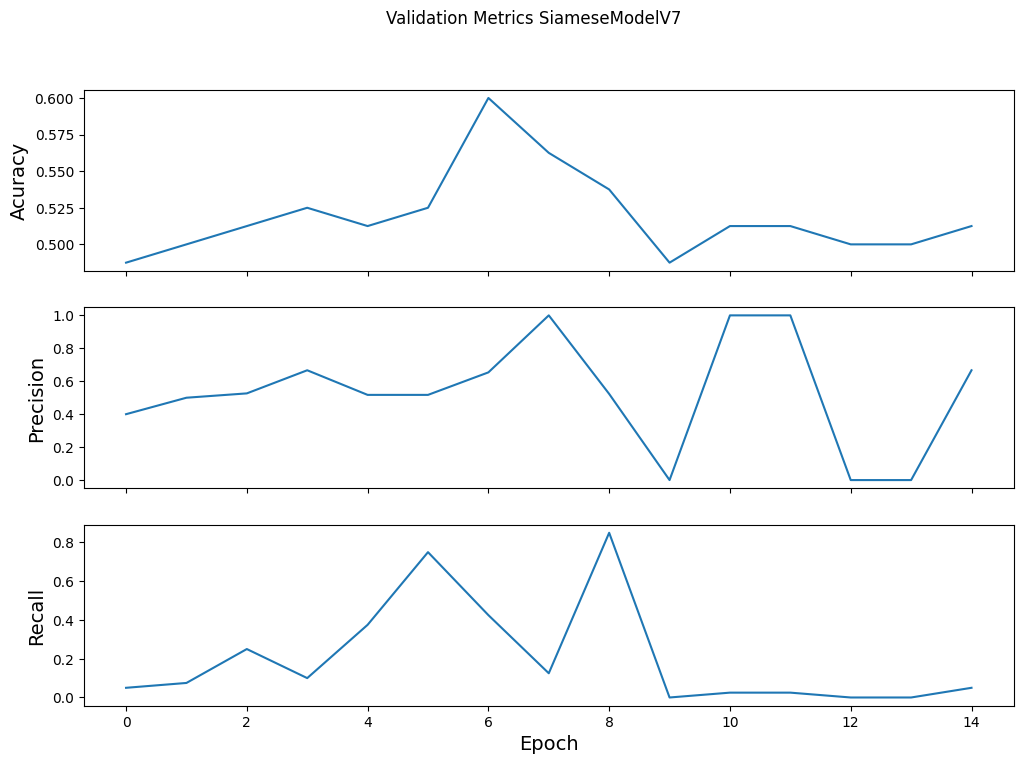

In [50]:
fig, axes = plt.subplots(3, sharex=True, figsize=(12, 8))
fig.suptitle('Validation Metrics SiameseModelV7')

axes[0].set_ylabel("Acuracy", fontsize=14)
axes[0].plot(output_val_accuracy)

axes[1].set_ylabel("Precision", fontsize=14)
axes[1].plot(output_val_precision)

axes[2].set_ylabel("Recall", fontsize=14)
axes[2].set_xlabel("Epoch", fontsize=14)
axes[2].plot(output_val_recall)
plt.show()

In [57]:
print(output_val_recall)

[<tf.Tensor: shape=(), dtype=float32, numpy=0.05>, <tf.Tensor: shape=(), dtype=float32, numpy=0.075>, <tf.Tensor: shape=(), dtype=float32, numpy=0.25>, <tf.Tensor: shape=(), dtype=float32, numpy=0.1>, <tf.Tensor: shape=(), dtype=float32, numpy=0.375>, <tf.Tensor: shape=(), dtype=float32, numpy=0.75>, <tf.Tensor: shape=(), dtype=float32, numpy=0.425>, <tf.Tensor: shape=(), dtype=float32, numpy=0.125>, <tf.Tensor: shape=(), dtype=float32, numpy=0.85>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.025>, <tf.Tensor: shape=(), dtype=float32, numpy=0.025>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.05>]


In [58]:
values = [tensor.numpy() for tensor in output_val_recall]

In [59]:
print(values)

[0.05, 0.075, 0.25, 0.1, 0.375, 0.75, 0.425, 0.125, 0.85, 0.0, 0.025, 0.025, 0.0, 0.0, 0.05]


# Testing model

In [70]:
test_input, test_val, y_true = ttdata.as_numpy_iterator().next()

In [71]:
r = Recall()
p = Precision()
a = Accuracy()
#f1 = F1Score(threshold=0.55)


for test_input, test_val, y_true in ttdata.as_numpy_iterator():
    yhat = siameseModel.predict([test_input, test_val])
    for i in range(len(yhat)):
        if(yhat[i]>0.5):
            yhat[i] = 1
        else:
            yhat[i] = 0
    print(yhat, y_true)
    r.update_state(y_true,yhat)
    p.update_state(y_true,yhat) 
    a.update_state(y_true,yhat)
    #f1.update_state(y_true,yhat)
    
print(a.result().numpy(), p.result().numpy(), r.result().numpy())

1/1 [==============================] - 3s 3s/step
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] [1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1]
1/1 [==============================] - 0s 25ms/step
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]] [1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0]
1/1 [==============================] - 0s 24ms/step
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] [1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0]
1/1 [==============================] - 0s 24ms/step
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] [0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0]
1/1 [==============================] - 0s 27ms/step
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] [1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0]
0.5375 1.0 0.075
